In [618]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [619]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [620]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/work1/tdata.zip', 'r')
file = zip_ref.extractall("./tmp")
zip_ref.close()

print("o")

o


In [621]:
DATASET="/content/tmp/tdata/train"
DATASET2="/content/tmp/tdata/valid"

In [622]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
        
train_data=[]

In [623]:
import os
import tensorflow as tf

import cv2
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv2.imread(os.path.join(path,img_file),1)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(64,64))            
            train_data.append([img,label])
            
test_data=[]

In [624]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv2.imread(os.path.join(path,img_file),1)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(64,64))
            test_data.append([img,label])
            
print(len(train_data))
print(len(test_data))

18345
4585


In [625]:
import random

In [626]:
random.shuffle(train_data)
random.shuffle(test_data)

In [627]:
for lbl in train_data[:10]:
    print(lbl[1])
    
X_train=[]
y_train=[]

0
7
9
6
7
1
6
3
5
7


In [628]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [629]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

In [630]:
len(X_train),len(y_train)

(18345, 18345)

In [631]:
X_test=[]
y_test=[]

In [632]:
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

In [633]:
len(X_test),len(y_test)

(4585, 4585)

In [634]:
import numpy as np
X_train=np.array(X_train).reshape(-1,1, 64,64,3)
X_train=X_train/255.0
X_train.shape

(18345, 1, 64, 64, 3)

In [635]:
X_test=np.array(X_test).reshape(-1,1, 64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 1, 64, 64, 3)

In [636]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

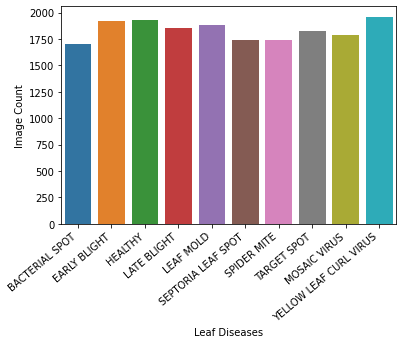

In [637]:
import seaborn as sns
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

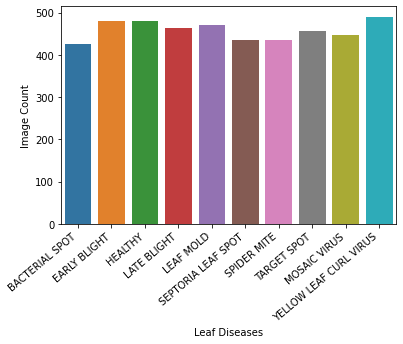

In [638]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [639]:
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

In [640]:
one_hot_train=to_categorical(y_train)
one_hot_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [641]:
one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [642]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

## CNN

In [643]:
# classifier=Sequential()
# classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Dropout(0.2))
# classifier.add(Conv2D(64,(3,3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Dropout(0.2))
# classifier.add(Conv2D(128,(3,3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Dropout(0.4))

# # classifier.add(Flatten())

# # classifier.add(Dense(activation='relu', units=64))
# # classifier.add(Dense(activation='relu', units=128))
# # classifier.add(Dense(activation='relu', units=64))
# # classifier.add(Dense(activation='softmax', units=10))

# classifier.summary()

## CNN-BiLSTM

In [644]:
def my_model():
  
  input_shape = (64, 64, 3)

  model = Sequential()
  x_input = Input(shape=input_shape)
  x = Conv2D(32, (3, 3), activation='relu')(x_input)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(0.2)(x)

  x = Conv2D(64, (3, 3), activation='relu',)(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Dropout(0.2)(x)

  x = Conv2D(128, (3, 3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x_output = Dropout(0.4)(x)

  base_model = Model(x_input, x_output)
  model.add(TimeDistributed(base_model, input_shape=base_model.input_shape))
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(150, activation='relu')))
  
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
  
  return model



classifier = my_model()
classifier.summary()
print("ok")

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_30 (TimeDis (None, None, 6, 6, 128)   93248     
_________________________________________________________________
time_distributed_31 (TimeDis (None, None, 4608)        0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 300)               5710800   
_________________________________________________________________
dense_30 (Dense)             (None, 64)                19264     
_________________________________________________________________
activation_30 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [645]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [605]:
hist=classifier.fit(X_train,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
115/115 [==============================] - 6s 27ms/step - loss: 2.1683 - accuracy: 0.1726 - val_loss: 1.3830 - val_accuracy: 0.5680
Epoch 2/50
115/115 [==============================] - 3s 23ms/step - loss: 1.2699 - accuracy: 0.5561 - val_loss: 0.7736 - val_accuracy: 0.7493
Epoch 3/50
115/115 [==============================] - 3s 23ms/step - loss: 0.8076 - accuracy: 0.7213 - val_loss: 0.5764 - val_accuracy: 0.7980
Epoch 4/50
115/115 [==============================] - 3s 23ms/step - loss: 0.6112 - accuracy: 0.7900 - val_loss: 0.5037 - val_accuracy: 0.8348
Epoch 5/50
115/115 [==============================] - 3s 23ms/step - loss: 0.5111 - accuracy: 0.8208 - val_loss: 0.4040 - val_accuracy: 0.8632
Epoch 6/50
115/115 [==============================] - 3s 23ms/step - loss: 0.4494 - accuracy: 0.8400 - val_loss: 0.3608 - val_accuracy: 0.8711
Epoch 7/50
115/115 [==============================] - 3s 23ms/step - loss: 0.3985 - accuracy: 0.8582 - val_loss: 0.3714 - val_accuracy: 0.8790

In [658]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

144/144 [==============================] - 1s 4ms/step - loss: 2.3035 - accuracy: 0.0757


(2.3034543991088867, 0.07568156719207764)

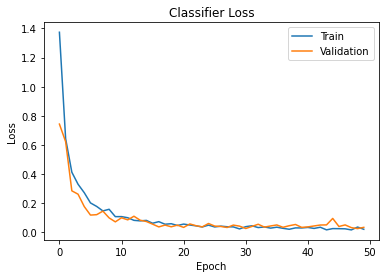

In [647]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

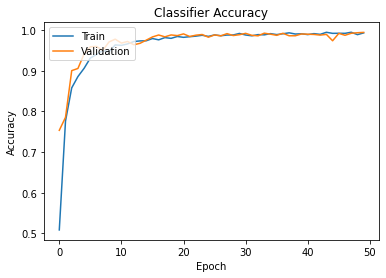

In [648]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [649]:
y_pred=classifier.predict_classes(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, ..., 0, 0, 4])

In [650]:
y_prob=classifier.predict_proba(X_test)
y_prob

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.10169589, 0.09938129, 0.10007285, ..., 0.10050377, 0.09869789,
        0.09890348],
       [0.10136731, 0.09955282, 0.1003866 , ..., 0.10021178, 0.09870919,
        0.09880149],
       [0.10133447, 0.09924718, 0.10026087, ..., 0.09972753, 0.09855823,
        0.09938933],
       ...,
       [0.10148272, 0.09919308, 0.10010273, ..., 0.09986191, 0.0988854 ,
        0.09920418],
       [0.10146528, 0.09922346, 0.10039727, ..., 0.09981933, 0.09873339,
        0.09918729],
       [0.10105017, 0.0994844 , 0.09942917, ..., 0.09991281, 0.09905419,
        0.09861255]], dtype=float32)

In [651]:
from sklearn.metrics import roc_curve, auc

In [652]:
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

In [653]:
n_class = 10

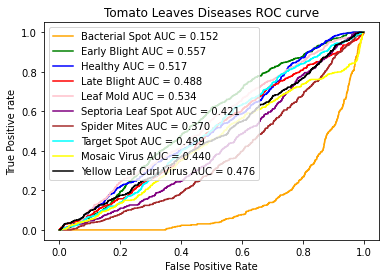

In [654]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [655]:
from sklearn.metrics import confusion_matrix

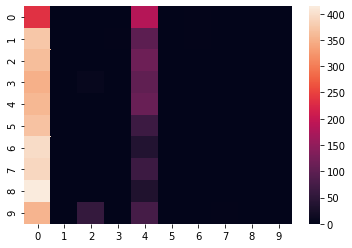

In [656]:
sns.heatmap(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

In [657]:
classifier.save("/content/drive/MyDrive/work1/model-bilstm.h5")